<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [2]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import 'random' to generate random sample
import random

# import statistics to perform statistical computation  
import statistics

# import 'stats' package from scipy library
from scipy import stats

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# to test the normality 
from scipy.stats import shapiro

# import the function to calculate the power of test
from statsmodels.stats import power

### Example:

#### 1. Ryan is a production manager at an industry manufacturing alloy seals. They have 4 machines - A, B, C and D. Ryan wants to study whether all the machines have equal efficiency. Ryan collects data of tensile strength from all the 4 machines as given. Perform the post-hoc test to find out which machine has a different average. Test at 5% level of significance.

<img src='1_ANOVA.png'>

In [3]:
x = np.array([68.7, 62.7, 55.9, 80.7, 75.4, 68.5, 56.1, 70.3, 70.9, 63.1, 57.3, 80.9, 79.1, 
62.2, 59.2, 85.4, 78.2, 60.3, 50.1, 82.3]).reshape(5,4).T
a = x[0,:]
b =x[1,:]
c =x[2,:]
d =x[3,:]

In [4]:
# Ho : All means are equal
# Ha : Atleast one mean is not equal

In [5]:
# Normality test

# Ho : Data is normal
# Ha : DAta is not  normal

In [6]:
print(stats.shapiro(a))
print(stats.shapiro(b))
print(stats.shapiro(c))
print(stats.shapiro(d))

ShapiroResult(statistic=0.9147661328315735, pvalue=0.4967544972896576)
ShapiroResult(statistic=0.8534730076789856, pvalue=0.2057477980852127)
ShapiroResult(statistic=0.8795409202575684, pvalue=0.3072359263896942)
ShapiroResult(statistic=0.8367964029312134, pvalue=0.15625961124897003)


In [7]:
# all pvalues > 0.05
# Data is normal

In [8]:
# Equality of Variance 

# Levene's Test

# Ho : All variance are equal
# Ha : Atleast one variance is not equal

In [9]:
print(stats.levene(a,b,c,d))

LeveneResult(statistic=0.3969333650936478, pvalue=0.7570021212992085)


In [10]:
# pval>0.05
# All variance are equal

In [11]:
# Data is normal
# Data have equal variance
# Pop std in unknow

# Anova can be used

In [12]:
stats.f_oneway(a,b,c,d)

F_onewayResult(statistic=32.03072350199285, pvalue=5.375613532781072e-07)

In [13]:
pval=5.375613532781072e-07
if pval<0.05:
    print('Ha is selected')
else:
    print('Ho is selected')

Ha is selected


In [14]:
# Atleast one tensile strength is different

# But, anova cannot identify which tensile strenth is different. For that, post hoc analysis
# can be done

## POST HOC ANALYSIS

## Tukey HSD

In [15]:
# create a dataframe using a dictionary from given data
df_machine = pd.DataFrame({'machine': ['machine_A','machine_B','machine_C','machine_D']*5, 
                           'strength': [68.7, 62.7, 55.9, 80.7, 75.4, 68.5, 56.1, 70.3, 70.9, 63.1, 57.3, 80.9, 79.1, 
                                               62.2, 59.2, 85.4, 78.2, 60.3, 50.1, 82.3]})
df_machine

,machine,strength
0,machine_A,68.7
1,machine_B,62.7
2,machine_C,55.9
3,machine_D,80.7
4,machine_A,75.4
5,machine_B,68.5
6,machine_C,56.1
7,machine_D,70.3
8,machine_A,70.9
9,machine_B,63.1


In [19]:
import statsmodels.stats.multicomp as mc

mc_tk = mc.MultiComparison(data=df_machine['strength'],groups=df_machine['machine'])
tk_hsd = mc_tk.tukeyhsd(alpha=0.05)
tk_hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
machine_A,machine_B,-11.1,0.0044,-18.8842,-3.3158,True
machine_A,machine_C,-18.74,0.001,-26.5242,-10.9558,True
machine_A,machine_D,5.46,0.2265,-2.3242,13.2442,False
machine_B,machine_C,-7.64,0.0553,-15.4242,0.1442,False
machine_B,machine_D,16.56,0.001,8.7758,24.3442,True
machine_C,machine_D,24.2,0.001,16.4158,31.9842,True


In [ ]:
# A != B
# A != C
# A = D
# B = C
# B != D
# C != D

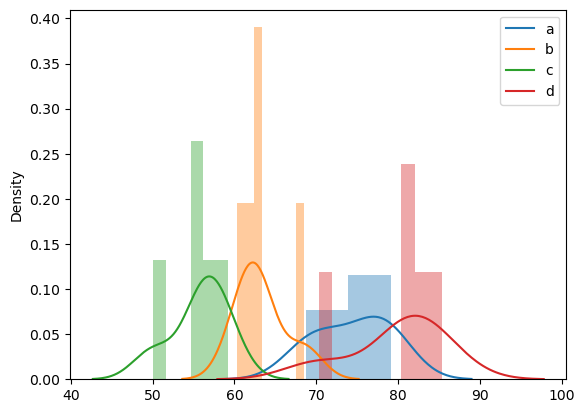

In [21]:
sns.distplot(a)
sns.distplot(b)
sns.distplot(c)
sns.distplot(d)
plt.legend(['a','b','c','d'])
plt.show()

# Relation in  Datasets

In [25]:
# Assuming data is normal and have equal variance

In [22]:
df = pd.read_csv('students_data.csv')

In [23]:
df.head()

,gender,ethnicity,education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,training_institute
0,female,group B,bachelor's degree,standard,none,89,55,56,200,Nature Learning
1,female,group C,college,standard,completed,55,63,72,190,Nature Learning
2,female,group B,master's degree,standard,none,64,71,56,191,Nature Learning
3,male,group A,associate's degree,free/reduced,none,60,99,72,231,Nature Learning
4,male,group C,college,standard,none,75,66,51,192,Nature Learning


### Is gender related to total score?

In [24]:
# Ho : mu1(male) = mu2(female)  => no relation b/w gender and total score
# Ha : mu1(male) != mu2(femake) => relation b/w gender and total score

In [ ]:
# Two sample t test (upaired)

In [26]:
female_score = df[df['gender']=='female']['total_score']
male_score = df[df['gender']=='male']['total_score']

In [ ]:
# Assuming data is normal and have equal variance

In [27]:
stats.ttest_ind(male_score,female_score)

Ttest_indResult(statistic=0.2743736370567049, pvalue=0.7838542822857014)

In [28]:
pvalue=0.7838542822857014
if pvalue<0.05:
    print('Ha is selected')
else:
    print('Ho is selected')

Ho is selected


In [ ]:
 # no relation b/w gender and total score

###  Is ethnicity related to total score?

In [ ]:
# Ho : All the mean are equal (No relation)
# Ha : Atleast one mean is not equal(Relation)

In [ ]:
# ANOVA

In [29]:
grp_a = df[df['ethnicity']=='group A']['total_score']
grp_b = df[df['ethnicity']=='group B']['total_score']
grp_c = df[df['ethnicity']=='group C']['total_score']
grp_d = df[df['ethnicity']=='group D']['total_score']
grp_e = df[df['ethnicity']=='group E']['total_score']

In [ ]:
# Assuming data is normal and have equal variance

In [30]:
stats.f_oneway(grp_a,grp_b,grp_c,grp_d,grp_e)

F_onewayResult(statistic=0.789109595922189, pvalue=0.5322937031083035)

In [31]:
pvalue=0.5322937031083035
if pvalue<0.05:
    print('Ha is selected')
else:
    print('Ho is selected')

Ho is selected


In [ ]:
 # no relation b/w ethnicity and total score

### Is gender related to education

In [ ]:
# Ho : Categorical features are independant (No relation)
# Ha : Categorical features are dependant (Relation)

In [32]:
obs_val= pd.crosstab(df['gender'],df['education'])
obs_val

education,Ph.D.,associate's degree,bachelor's degree,college,high school,master's degree
gender,,,,,,
female,91,116,63,117,94,36
male,88,106,55,108,103,23


In [33]:
stats.chi2_contingency(obs_val)

(3.5267538812534243,
 0.6193433487137843,
 5,
 array([[ 92.543, 114.774,  61.006, 116.325, 101.849,  30.503],
        [ 86.457, 107.226,  56.994, 108.675,  95.151,  28.497]]))

In [34]:
pvalue=0.6193433487137843
if pvalue<0.05:
    print('Ha is selected')
else:
    print('Ho is selected')

Ho is selected


In [35]:
# There is no relation b/w gender and education

### Is reading mark is related to total mark?

In [36]:
df[['reading_score','total_score']].corr()

,reading_score,total_score
reading_score,1.000000,0.577148
total_score,0.577148,1.000000


In [ ]:
# Ho : corr=0 (no relation)
# Ha : corr !=0 (relation)

In [37]:
stats.pearsonr(df['reading_score'],df['total_score'])

(0.5771479640889049, 7.022400001971566e-90)

In [38]:
pvalue=7.022400001971566e-90
if pvalue<0.05:
    print('Ha is selected')
else:
    print('Ho is selected')

Ha is selected


In [39]:
# There is relation b/w reading score and total_score